In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path

In [2]:
%%markdown
# Pre vs Post

# Pre vs Post


In [3]:
image_path = Path("/local_storage/datasets/sgerard/xview2/no_overlap/train/images")

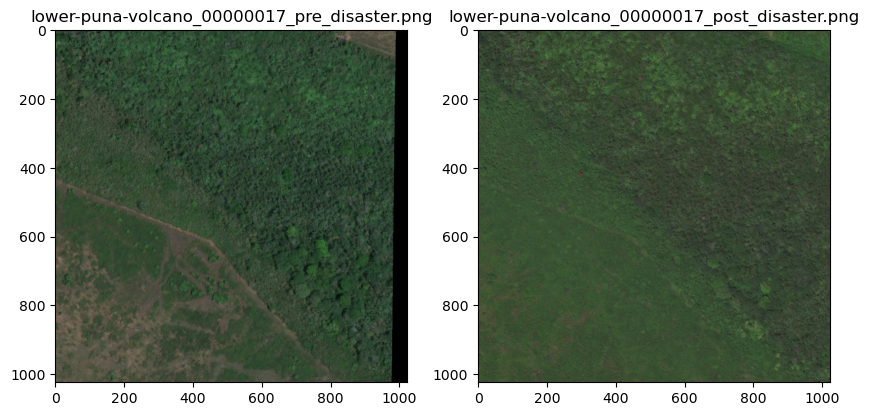

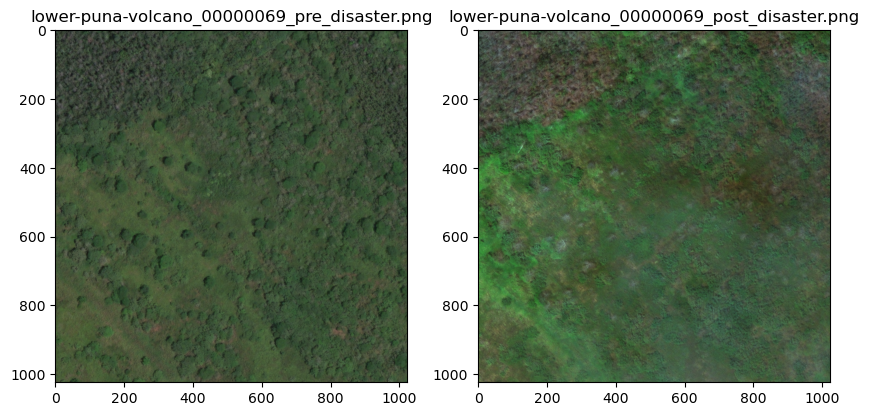

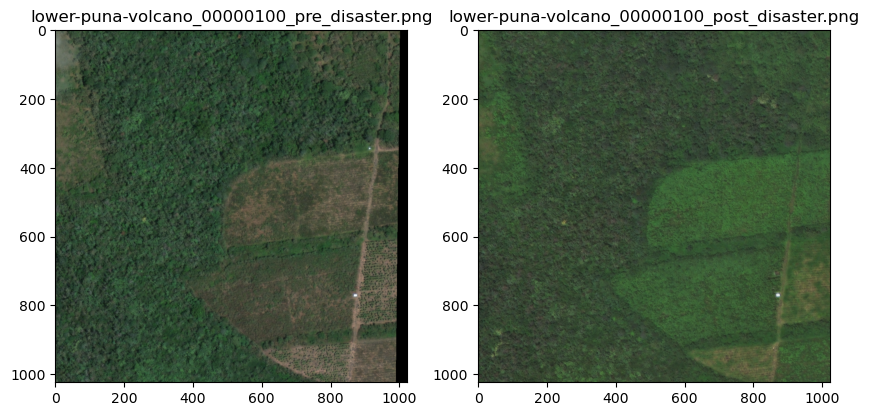

In [4]:
for image in list(image_path.glob("*volcano*pre*"))[:3]:
    # create subplot to show post and pre images
    fig, ax = plt.subplots(1,2,figsize=(10,10))
    # load the image
    ax[0].imshow(np.array(Image.open(image)))
    ax[1].imshow(np.array(Image.open(str(image).replace("pre","post"))))
    # set the title
    ax[0].set_title(image.name)
    ax[1].set_title(str(image.name).replace("pre","post"))
    # show the plot
    plt.show()

In [15]:
UID = 'hurricane-matthew_00000189'
test_dir= '/local_storage/datasets/sgerard/xview2/no_overlap/test'
pred_dir= '/local_storage/users/paulbp/xview2/predictions'
image = np.array(Image.open(f"{test_dir}/images/{UID}_post_disaster.png"))
mask=np.array(Image.open(f"{test_dir}/targets/{UID}_post_disaster_target.png"))
pred=np.array(Image.open(f"{pred_dir}/no1_no_no_overlap_seed0/submission_resnet34_no1_no_no_overlap_seed0_0/{UID}_damage_disaster_prediction.png"))
new_pred=np.array(Image.open(f"/local_storage/users/paulbp/xview2/ssl/test_supervised/submission_test/{UID}_pre_disaster.png"))

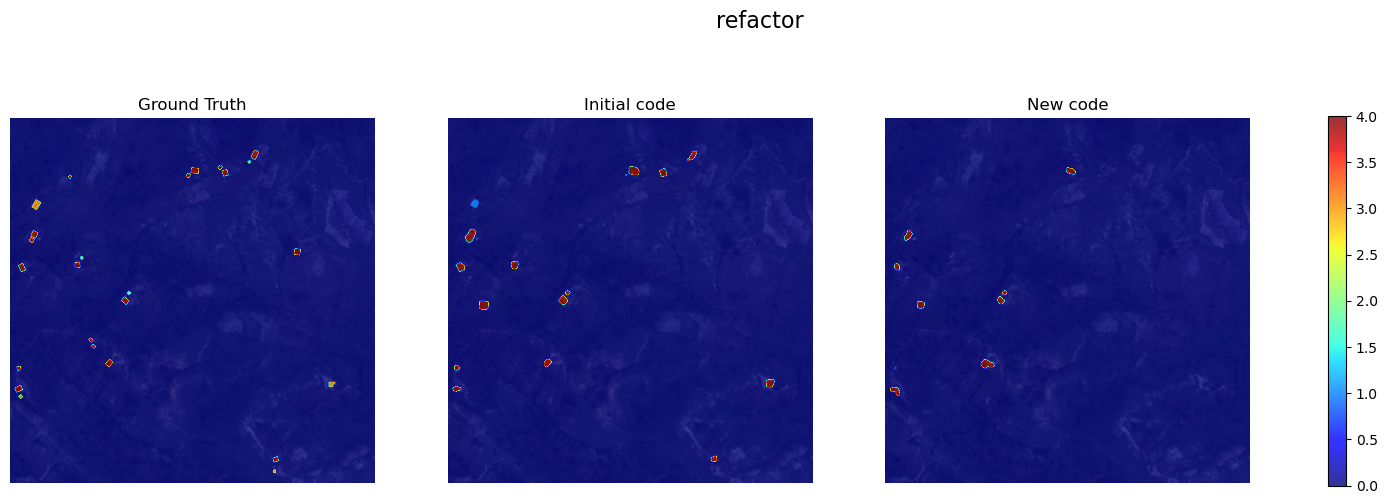

In [17]:
dmg=[]
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
ax1.imshow(image)
msk =ax1.imshow(mask,alpha=0.8, cmap='jet',vmin=0, vmax=4)
ax1.set_title('Ground Truth')
ax1.axis('off')

ax2.imshow(image)
ax2.imshow(pred, alpha=0.8,cmap='jet',vmin=0, vmax=4)
ax2.set_title('Initial code')
ax2.axis('off')

ax3.imshow(image)
ax3.imshow(new_pred,alpha=0.8, cmap='jet',vmin=0, vmax=4)
ax3.set_title('New code')
ax3.axis('off')

fig.suptitle("refactor", fontsize=16)
fig.colorbar(msk, ax=(ax1,ax2,ax3),shrink=0.8)

plt.show()

In [17]:
%%markdown
# Latent inspection

# Latent inspection


In [9]:
import os
from os import path,  listdir
import sys

import numpy as np
import timeit


from inspect_latent import get_umap_embedding, get_embeddings, save_embeddings

/Midgard/home/paulbp/miniconda3/envs/xenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
t0 = timeit.default_timer()
seed = 0
dir_prefix = "no1_no_no_overlap_seed0"
img_dirs = ['/local_storage/datasets/sgerard/xview2/train/images']
models_folder = f'/local_storage/users/paulbp/xview2/weights/{dir_prefix}/'
pred_embedding_folder = f'/local_storage/users/paulbp/xview2/predictions/{dir_prefix}/embeddings_train/'
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'

In [11]:
#embeddings = get_embeddings(img_dirs, models_folder, pred_embedding_folder, seed)
#save_embeddings(embeddings, pred_embedding_folder)

In [12]:
# read embeddings
embeddings = []
for f in sorted(listdir(pred_embedding_folder)):
    if f.endswith('.npy'):
        embeddings.append(np.load(path.join(pred_embedding_folder, f), allow_pickle=True).item())


In [13]:
cmap={  "portugal-wildfire": "black",
        
        "pinery-bushfire": "gray",
      
        "nepal-flooding": "purple",
    
        "lower-puna-volcano": "brown",
      
        #South East Asia
        "palu-tsunami": "pink",
        "sunda-tsunami": "pink",
        #California
        "socal-fire": "red",
        "woolsey-fire": "red",
        "santa-rosa-wildfire": "red",
        #US Midwest
        "midwest-flooding": "blue",
        "moore-tornado": "blue",
        "joplin-tornado": "blue",
        "hurricane-harvey": "blue",
        "tuscaloosa-tornado": "blue",
        #Floria and around
        "hurricane-florence": "green",
        "hurricane-michael": "green",
        "hurricane-matthew": "green",
        # Central America
        "guatemala-volcano": "orange",
        "mexico-earthquake": "orange"}

In [14]:
umap_embedding, labels = get_umap_embedding(embeddings,{"n_neighbors":30, "min_dist":0, "n_components":2,"metric":"cosine"},"disaster")

Loading BokehJS ...

In [15]:
import pandas as pd

df = pd.DataFrame({'labels': labels, 'umap_x': umap_embedding[:, 0], 'umap_y': umap_embedding[:, 1]})
df.to_csv(f'{pred_embedding_folder}/umap_embedding.csv', index=False)
df

,labels,umap_x,umap_y
0,hurricane-florence,5.478189,10.578650
1,hurricane-florence,1.855359,11.464129
2,hurricane-florence,6.012363,10.736628
3,hurricane-florence,1.195912,12.904532
4,hurricane-michael,6.077021,11.455775
...,...,...,...
8971,hurricane-michael,5.318625,11.256157
8972,hurricane-michael,5.784248,11.262755
8973,hurricane-michael,1.515339,11.892579
8974,hurricane-michael,4.844890,11.046675


In [15]:
UID = 'santa-rosa-wildfire_00000198'
test_dir= '/local_storage/datasets/sgerard/xview2/test'
pred_dir= '/local_storage/users/paulbp/xview2/predictions/simpler_no_otsu0/pred34_loc_0'
image = np.array(Image.open(f"{test_dir}/images/{UID}_pre_disaster.png"))
mask=np.array(Image.open(f"{test_dir}/targets/{UID}_pre_disaster_target.png"))
pred=np.array(Image.open(f"{pred_dir}/{UID}_pre_disaster_part1.png"))

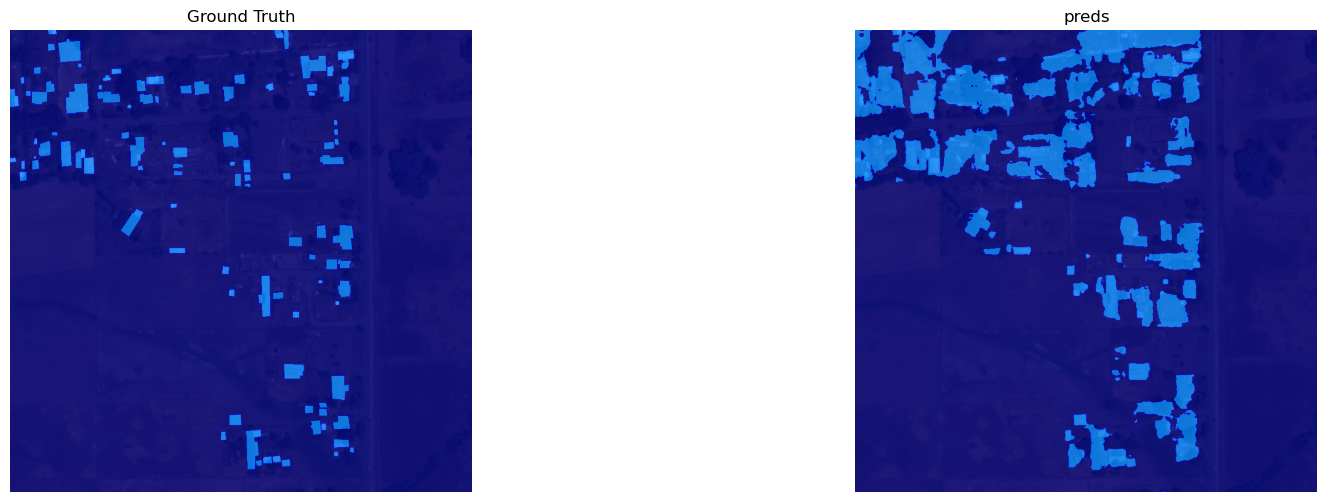

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
ax1.imshow(image)
msk =ax1.imshow((mask==1),alpha=0.8, cmap='jet',vmin=0, vmax=4)
ax1.set_title('Ground Truth')
ax1.axis('off')

ax2.imshow(image)
ax2.imshow((pred>0.9), alpha=0.8,cmap='jet',vmin=0, vmax=4)
ax2.set_title('preds')
ax2.axis('off')



plt.show()